![alt text](https://i.imgur.com/1WaY7aA.png)

# Lab 6.4
# *PCA Lab*

**In this lab, we will:**
- Explore how PCA is related to correlation.
- Use PCA to perform dimensionality reduction.

### 1. Load Data

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
# IMPORT LABRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
breast_cancer_csv = '../DATA/breast-cancer-wisconsin-data.csv'
data = pd.read_csv(breast_cancer_csv, index_col='id')

### 2. EDA 

Explore dataset. Clean data. Find correlation. 

In [3]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isnull().sum()

diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: i

In [5]:
data.drop(['Unnamed: 32'], axis=1, inplace=True)

In [6]:
diagnosis_map = {'B': 1, 'M': 0}

data['diagnosis'] = data['diagnosis'].map(diagnosis_map)

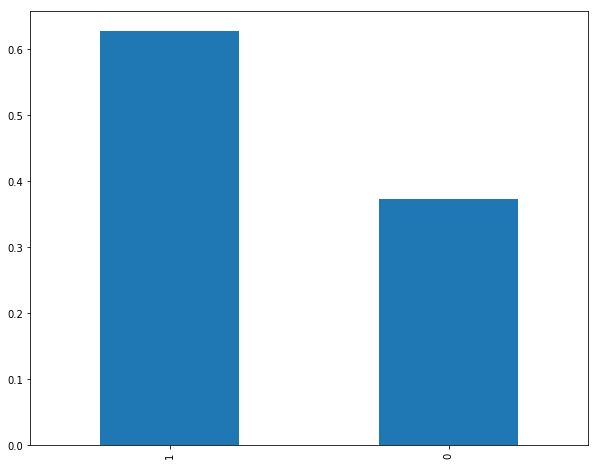

In [7]:
data['diagnosis'].value_counts(normalize=True).plot(kind='bar',figsize=(10,8));

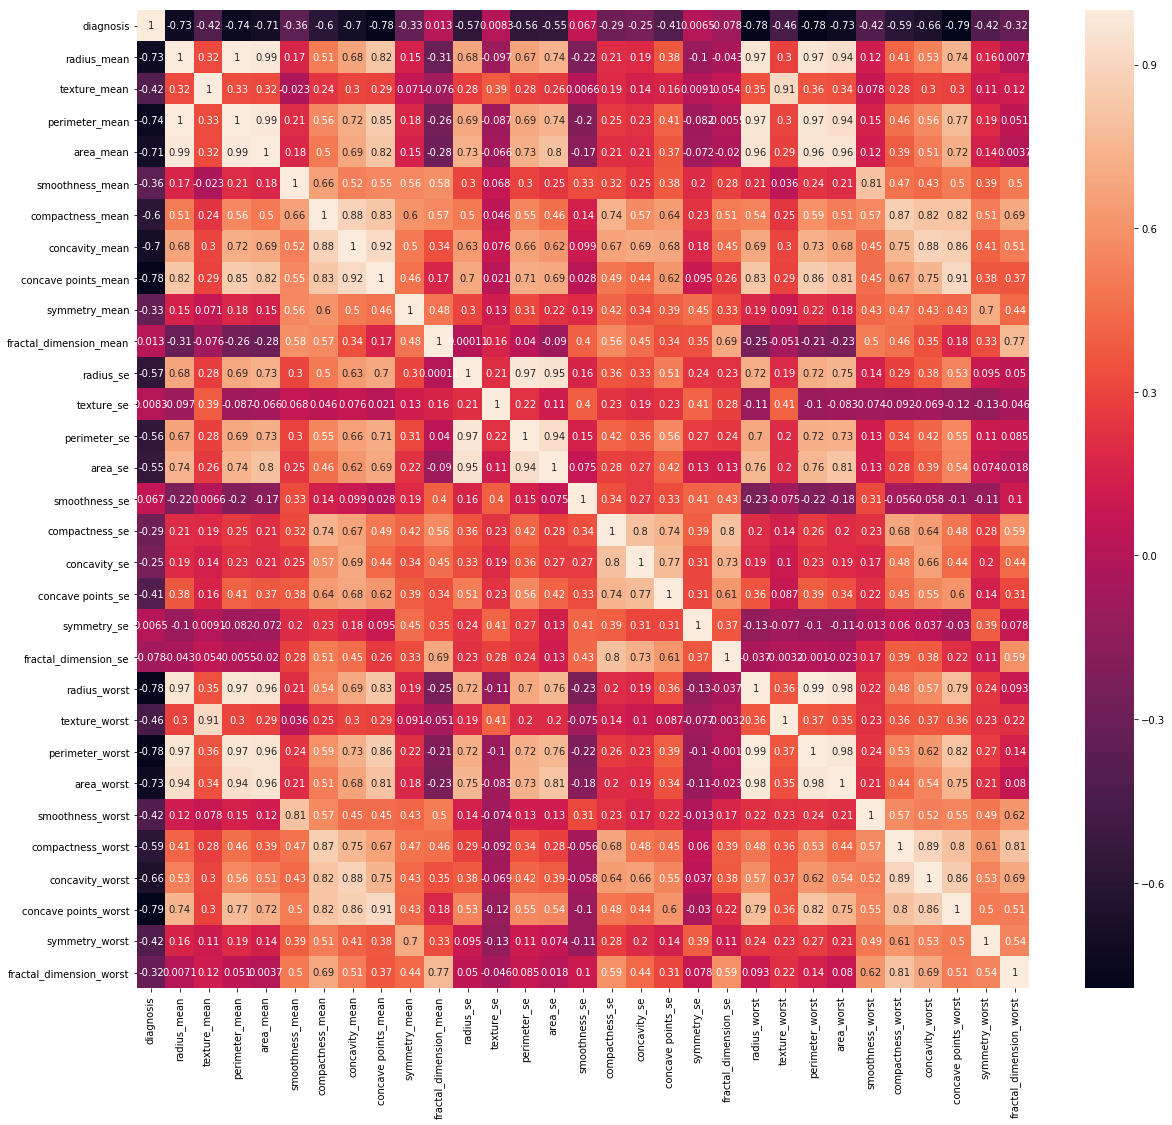

In [8]:
plt.subplots(figsize=(20,18))
sns.heatmap(data.corr(),annot=True);

### 3. Subset & Normalize

Subset the data to only include all columns except diagnosis. We will be comparing the principal components to age specifically, so we are leaving age out.

In [9]:
# ANSWER

target = 'diagnosis'
features = list(set(list(data.columns)) - set([target]))

In [10]:
scalar = StandardScaler()
X = scalar.fit_transform(data[features])

y = data[target]

### Calculate correlation matrix

We will be using the correlation matrix to calculate the eigenvectors and eigenvalues.

In [11]:
# ANSWER
Xdf = pd.DataFrame(X,columns=features)
Xdf.corr()

,compactness_se,concave points_mean,radius_worst,smoothness_se,perimeter_mean,area_worst,smoothness_mean,perimeter_se,fractal_dimension_worst,concave points_se,...,fractal_dimension_mean,symmetry_se,concavity_mean,concave points_worst,concavity_worst,symmetry_worst,symmetry_mean,smoothness_worst,area_mean,texture_mean
compactness_se,1.000000,0.490424,0.204607,0.336696,0.250744,0.199371,0.318943,0.416322,0.590973,0.744083,...,0.559837,0.394713,0.670279,0.483208,0.639147,0.277878,0.421659,0.227394,0.212583,0.191975
concave points_mean,0.490424,1.000000,0.830318,0.027653,0.850977,0.809630,0.553695,0.710650,0.368661,0.615634,...,0.166917,0.095351,0.921391,0.910155,0.752399,0.375744,0.462497,0.452753,0.823269,0.293464
radius_worst,0.204607,0.830318,1.000000,-0.230691,0.969476,0.984015,0.213120,0.697201,0.093492,0.358127,...,-0.253691,-0.128121,0.688236,0.787424,0.573975,0.243529,0.185728,0.216574,0.962746,0.352573
smoothness_se,0.336696,0.027653,-0.230691,1.000000,-0.202694,-0.182195,0.332375,0.151075,0.101480,0.328429,...,0.401964,0.413506,0.098564,-0.102007,-0.058298,-0.107342,0.187321,0.314457,-0.166777,0.006614
perimeter_mean,0.250744,0.850977,0.969476,-0.202694,1.000000,0.941550,0.207278,0.693135,0.051019,0.407217,...,-0.261477,-0.081629,0.716136,0.771241,0.563879,0.189115,0.183027,0.150549,0.986507,0.329533
area_worst,0.199371,0.809630,0.984015,-0.182195,0.941550,1.000000,0.206718,0.730713,0.079647,0.342271,...,-0.231854,-0.110343,0.675987,0.747419,0.543331,0.209146,0.177193,0.209145,0.959213,0.343546
smoothness_mean,0.318943,0.553695,0.213120,0.332375,0.207278,0.206718,1.000000,0.296092,0.499316,0.380676,...,0.584792,0.200774,0.521984,0.503053,0.434926,0.394309,0.557775,0.805324,0.177028,-0.023389
perimeter_se,0.416322,0.710650,0.697201,0.151075,0.693135,0.730713,0.296092,1.000000,0.085433,0.556264,...,0.039830,0.266487,0.660391,0.554897,0.418899,0.109930,0.313893,0.130054,0.726628,0.281673
fractal_dimension_worst,0.590973,0.368661,0.093492,0.101480,0.051019,0.079647,0.499316,0.085433,1.000000,0.310655,...,0.767297,0.078079,0.514930,0.511114,0.686511,0.537848,0.438413,0.617624,0.003738,0.119205
concave points_se,0.744083,0.615634,0.358127,0.328429,0.407217,0.342271,0.380676,0.556264,0.310655,1.000000,...,0.341198,0.312780,0.683260,0.602450,0.549592,0.143116,0.393298,0.215351,0.372320,0.163851


### 4. Calculate the eigenvalues and eigenvectors from the correlation matrix

numpy has a convenient function to calculate this:

    eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

In [12]:
# ANSWER

eigenvalues, eigenvectors = np.linalg.eig(Xdf.corr())


### 5. Calculate and plot the explained variance

A useful measure is the **explained variance**, which is calculated from the eigenvalues. 

The explained variance tells us how much information (variance) is captured by each principal component.

### $$ ExpVar_i = \bigg(\frac{eigenvalue_i}{\sum_j^n{eigenvalue_j}}\bigg) * 100$$

In [13]:
def calculate_cum_var_exp(eig_vals):
    '''
    Calculate Explained Variance from Eigenvalues
    '''
    total = sum(eig_vals)
    sorted_eig = sorted(eig_vals, reverse=True)
    var_exp =[(ieg/total)*100 for ieg in sorted_eig]
    
    return np.cumsum(var_exp)


In [14]:
def plot_var_exp(eig_vals):
    
    cum_var_exp = calculate_cum_var_exp(eig_vals)
    
    plt.figure(figsize=(9,7))

    component_number = [i+1 for i in range(len(cum_var_exp))]

    plt.plot(component_number, cum_var_exp, lw=7)

    plt.axhline(y=0, linewidth=5, color='grey', ls='dashed')
    plt.axhline(y=100, linewidth=3, color='grey', ls='dashed')

    ax = plt.gca()
    ax.set_xlim([1,30])
    ax.set_ylim([-5,105])

    ax.set_ylabel('cumulative variance explained', fontsize=16)
    ax.set_xlabel('component', fontsize=16)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(12) 

    ax.set_title('component vs cumulative variance explained\n', fontsize=20)

    plt.show()

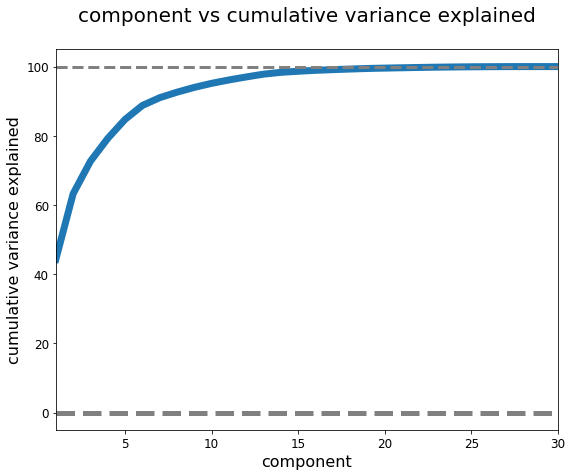

In [15]:
plot_var_exp(eigenvalues)

### 6. Using sklearn For PCA

    from sklearn.decomposition import PCA
    
- Create an instance of PCA
- Fit X
- Plot the explained variance
- Define n_components
    - n_component
- Apply dimensionality reduction to X
    - transform
- Create PairPlot of PCA

In [16]:
# ANSWER
# Create an instance of PCA

pca = PCA(n_components=16)
# Fit Xs
pca.fit(Xdf) 


PCA(copy=True, iterated_power='auto', n_components=16, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

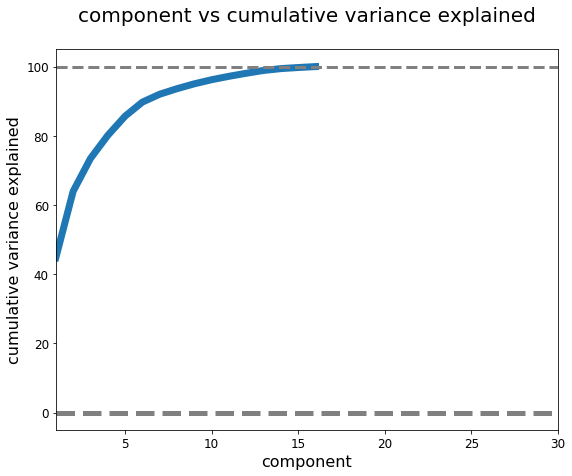

In [17]:
# ANSWER
# Plot explained_variance_
plot_var_exp(pca.explained_variance_)

In [18]:
# ANSWER
# Apply dimensionality reduction to Xs using transform
df_PCA = pd.DataFrame(pca.transform(Xdf))


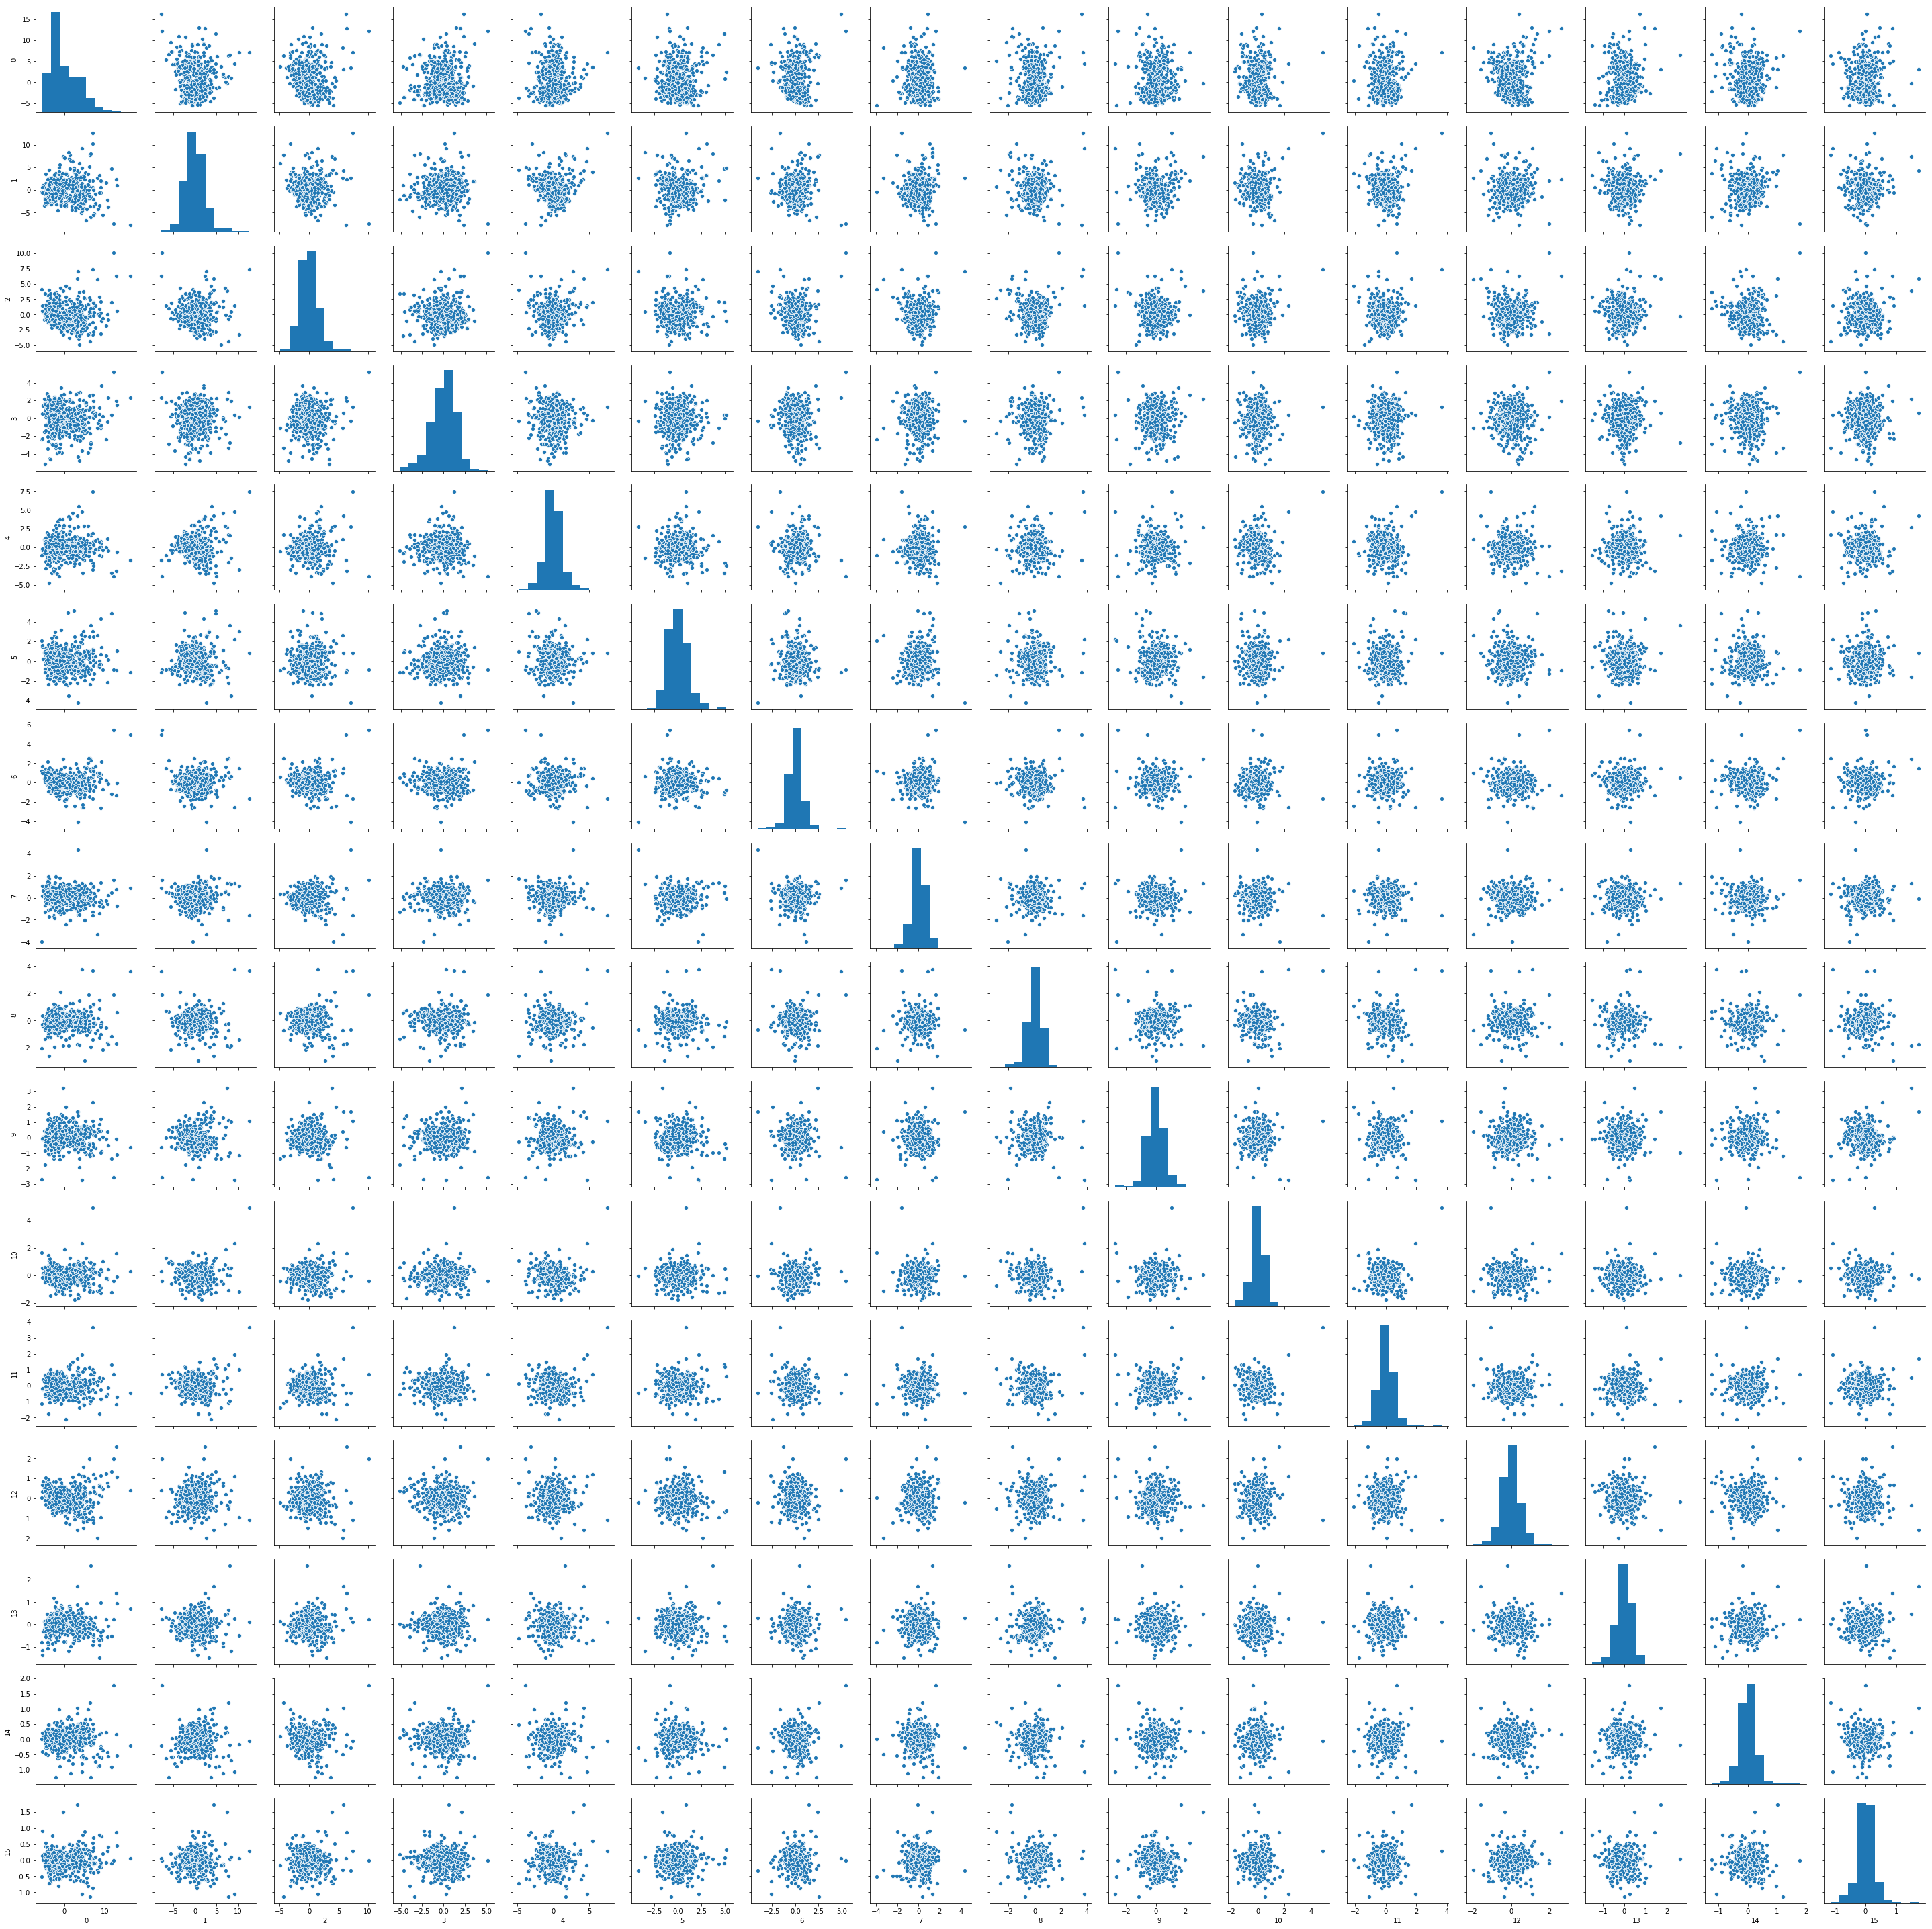

In [19]:
# ANSWER
# Create PairPlot of PCA
sns.pairplot(df_PCA);


### 7. Split Data to 80/20 and Use PCA you created in 6 as X

Split data 80/20 and Use KNN to find score.

In [20]:
# ANSWER
# Split Data
X_train, X_test, y_train, y_test = train_test_split(df_PCA, y, test_size=0.2, random_state=1)


In [21]:
# ANSWER
def run_model(X_train, X_test, y_train, y_test, k=1):
    model = KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train,y_train)
    #pred = model.predict(X)
    #print (model.score(X_test,y_test))
    
    return model.score(X_test,y_test)



run_model(X_train, X_test, y_train, y_test, k=5)

0.956140350877193

In [22]:
# unscaled and original dimensions
X = data[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
run_model(X_train, X_test, y_train, y_test, k=5)

0.9385964912280702

**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Breast Cancer Machine Learning Prediction](https://gtraskas.github.io/post/breast_cancer/)

[Understanding PCA (Principal Component Analysis) with Python](https://towardsdatascience.com/dive-into-pca-principal-component-analysis-with-python-43ded13ead21)

**© 2019 Data Science Institute of Australia**